# Reccurent Neural Networks RNNs

## RNN on a Sine Wave - The Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x=np.linspace(0,50,501)
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [3]:
y=np.sin(x)

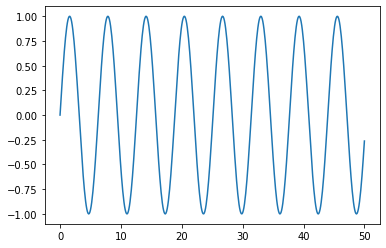

In [4]:
plt.plot(x,y)

In [5]:
df=pd.DataFrame(data=y, index=x, columns=['Sin'])
df

,Sin
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


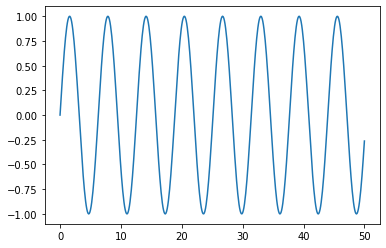

In [6]:
plt.plot(df)

In [7]:
len(df)

501

In [8]:
test_percent=0.1

In [9]:
len(df)*test_percent

50.1

In [10]:
test_point=np.round(len(df)*test_percent)
test_point

50.0

In [11]:
test_ind=int(len(df)-test_point)
test_ind

451

In [12]:
train=df.iloc[:test_ind]
test=df.iloc[test_ind:]

In [13]:
test

,Sin
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [14]:
from sklearn.preprocessing import MinMaxScaler


scaler=MinMaxScaler()

scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test)

## RNN on a Sine Wave - Batch Generator

In [15]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module tensorflow.python.keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, tensorflow.python.keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 | 

In [16]:



length=2
batch_size=1

generator=TimeseriesGenerator(data=scaled_train, targets=scaled_train, length=length, batch_size=batch_size)


In [17]:
len(scaled_train)

451

In [18]:
len(generator) # len(scaled_train) - length

449

In [19]:
generator[0] #given (lenght) values try to predict next value(s)

(array([[[0.49999912],
         [0.54991622]]]),
 array([[0.59933458]]))

In [20]:
scaled_train[:length+batch_size]

array([[0.49999912],
       [0.54991622],
       [0.59933458]])

## RNN on a Sine Wave - Creating the Model

In [21]:
length=50
batch_size=1

generator=TimeseriesGenerator(data=scaled_train, targets=scaled_train, length=length, batch_size=batch_size)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

n_features=1

model=Sequential()

#units=length in generator
model.add(SimpleRNN(units=50, input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit_generator(generator, epochs=5)

Epoch 1/5
401/401 [==============================] - 38s 95ms/step - loss: 0.0016
Epoch 2/5
401/401 [==============================] - 40s 101ms/step - loss: 7.4763e-04
Epoch 3/5
401/401 [==============================] - 41s 103ms/step - loss: 2.0075e-05
Epoch 4/5
401/401 [==============================] - 46s 115ms/step - loss: 7.4492e-06
Epoch 5/5
401/401 [==============================] - 47s 116ms/step - loss: 5.2494e-04


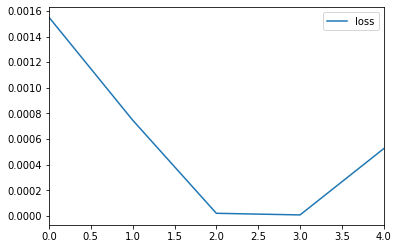

In [24]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [25]:
#first_eval_batch=scaled_train[-length:]
#first_eval_batch=firts_eval_batch.reshape((1,length, n_features))

#model.predict(firts_eval_batch)

In [26]:
scaled_test[0]

array([0.94955134])

In [27]:
#test_prediction=[]


#first_eval_batch=scaled_train[-length:] #[[]]

#current_batch=first_eval_batch.reshape((1,length, n_features)) #[[[]]]

#first_eval_batch #[[]]

In [28]:
#predicted_value=[[[99]]]

#np.append(current_batch[:,1:,:], [[[99]]], axis=1)

In [29]:
test_prediction=[]


first_eval_batch=scaled_train[-length:] #[[]]

current_batch=first_eval_batch.reshape((1,length, n_features)) #[[[]]]

for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [30]:
true_predictions=scaler.inverse_transform(test_prediction)

In [31]:
test['Simple RNN Predictions']=true_predictions

C:\Users\User\anaconda3\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


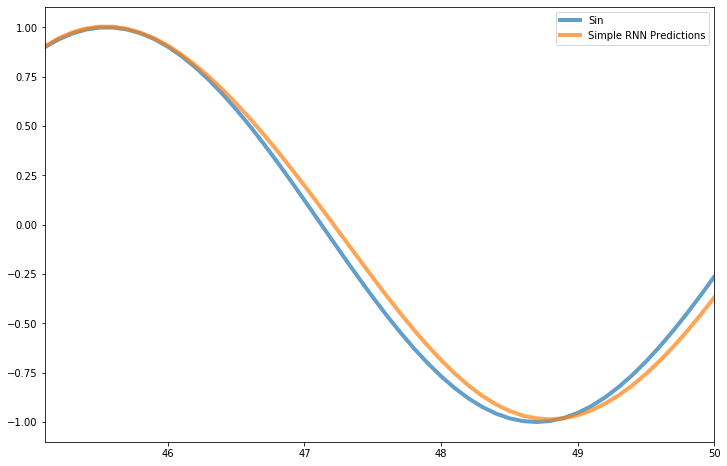

In [32]:
test.plot(figsize=(12,8), alpha=0.7, lw=4)

## RNN on a Sine Wave - LSTMs and Forecasting

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='val_loss', patience=2)


length=49 # than scaled_test length
batch_size=1

generator=TimeseriesGenerator(data=scaled_train, targets=scaled_train, length=length, batch_size=batch_size)

validation_generator=TimeseriesGenerator(data=scaled_test, targets=scaled_test, length=length, batch_size=batch_size)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

n_features=1

model=Sequential()

#units=length in generator
model.add(LSTM(units=50, input_shape=(length, n_features))) #LSTM instead SimpleRNN
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator, epochs=20, validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 95s 237ms/step - loss: 0.0177 - val_loss: 3.0941e-06
Epoch 2/20
402/402 [==============================] - 91s 226ms/step - loss: 1.0043e-04 - val_loss: 1.5695e-05
Epoch 3/20
402/402 [==============================] - 72s 179ms/step - loss: 1.0167e-04 - val_loss: 5.5835e-04


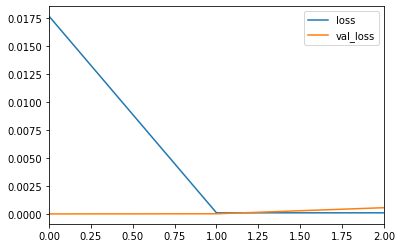

In [34]:
losses=pd.DataFrame(model.history.history)
losses.plot()

C:\Users\User\anaconda3\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


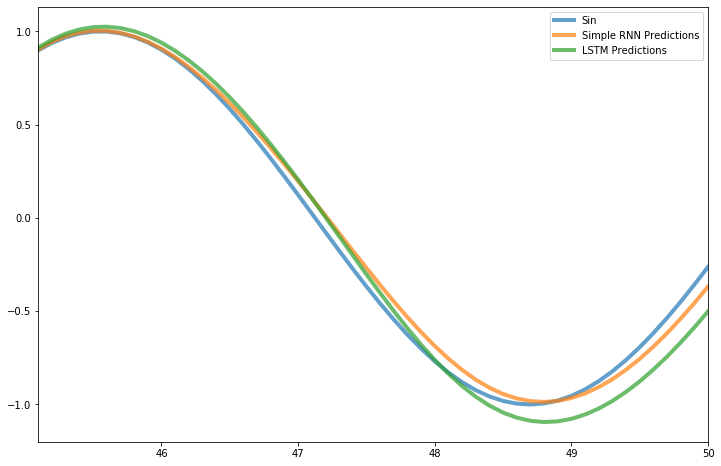

In [35]:
test_prediction=[]


first_eval_batch=scaled_train[-length:] #[[]]

current_batch=first_eval_batch.reshape((1,length, n_features)) #[[[]]]

for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:], [[current_pred]], axis=1)
    
    
    
true_predictions=scaler.inverse_transform(test_prediction)
test['LSTM Predictions']=true_predictions

test.plot(figsize=(12,8), alpha=0.7, lw=4)

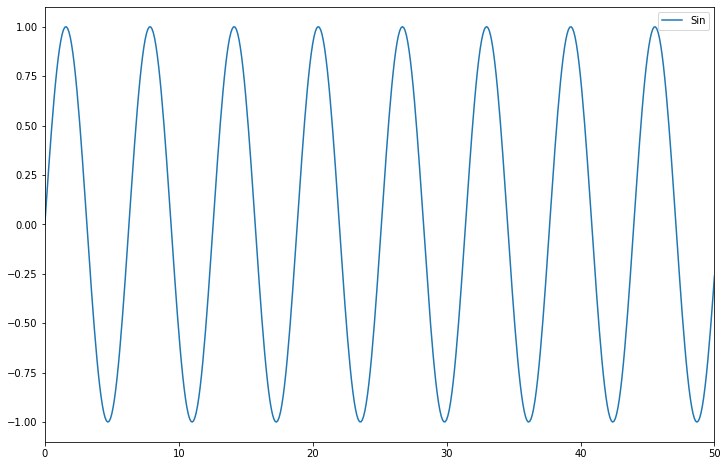

In [37]:
df.plot(figsize=(12,8))

### Retraining on all the data

In [38]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=6)

Epoch 1/6
451/451 [==============================] - 107s 238ms/step - loss: 0.0202
Epoch 2/6
451/451 [==============================] - 107s 238ms/step - loss: 1.9100e-04
Epoch 3/6
451/451 [==============================] - 99s 219ms/step - loss: 2.1215e-04
Epoch 4/6
451/451 [==============================] - 82s 181ms/step - loss: 1.7046e-04
Epoch 5/6
451/451 [==============================] - 97s 215ms/step - loss: 2.4875e-04
Epoch 6/6
451/451 [==============================] - 81s 180ms/step - loss: 3.2563e-04


In [51]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(50): #forecast
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [52]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[-0.16969696],
       [-0.07120256],
       [ 0.02810442],
       [ 0.12739471],
       [ 0.22575446],
       [ 0.32221045],
       [ 0.41574345],
       [ 0.50531349],
       [ 0.58988418],
       [ 0.66845749],
       [ 0.7400986 ],
       [ 0.80396971],
       [ 0.85934651],
       [ 0.90563463],
       [ 0.9423763 ],
       [ 0.96924753],
       [ 0.98605781],
       [ 0.99273705],
       [ 0.98932817],
       [ 0.97597469],
       [ 0.95291003],
       [ 0.92044602],
       [ 0.87896367],
       [ 0.82890594],
       [ 0.77077209],
       [ 0.70511357],
       [ 0.63253215],
       [ 0.5536818 ],
       [ 0.46926799],
       [ 0.38004866],
       [ 0.28683275],
       [ 0.19047785],
       [ 0.09188254],
       [-0.00802286],
       [-0.10829036],
       [-0.20797022],
       [-0.30612547],
       [-0.40184547],
       [-0.49425476],
       [-0.58251297],
       [-0.66580818],
       [-0.74334534],
       [-0.81433175],
       [-0.87796979],
       [-0.93345936],
       [-0

In [53]:
print(len(forecast))
50*0.1

50


5.0

In [54]:
forecast_index = np.arange(50.1,55.1,step=0.1)
len(forecast_index)

50

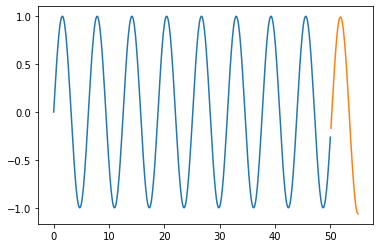

In [55]:
plt.plot(df.index,df['Sin'])
plt.plot(forecast_index,forecast)

## RNN on a Time Series - Part One

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
df=pd.read_csv('@Source\\DATA\\RSCCASN.csv', parse_dates=True, index_col='DATE')
df.columns=['Sales']
df #monthly data

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


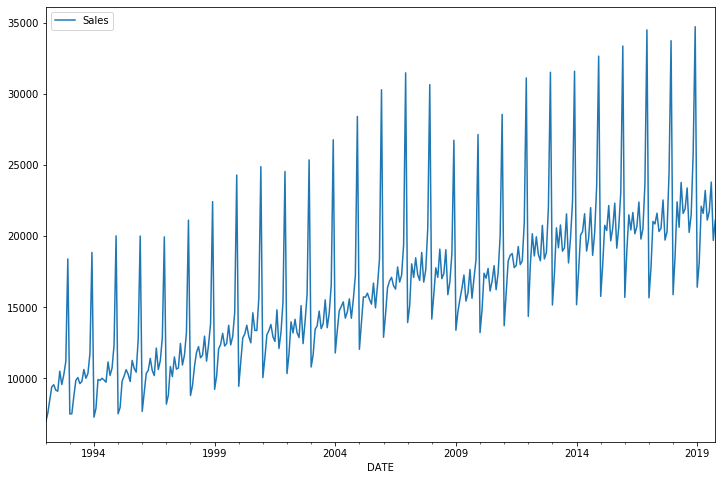

In [62]:
df.plot(figsize=(12,8))

In [65]:
len(df)

334

In [67]:
test_size=18 #18 = 1.5 year
test_ind=len(df)-test_size 
test_ind

316

In [68]:
train=df.iloc[:test_ind]
test=df.iloc[test_ind:]

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test)

In [72]:
len(test)

18

In [73]:
#batches should be less than len(test)

In [74]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length=12

generator=TimeseriesGenerator(scaled_train, scaled_train,length=length, batch_size=1)

In [75]:
X,y=generator[0]

X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [76]:
y

array([[0.02047633]])

In [81]:
scaled_train[12]

array([0.02047633])

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

n_features=1

early_stop = EarlyStopping(monitor='val_loss',patience=2)


#input_shape - IMPORTANT!!!
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
304/304 [==============================] - 16s 52ms/step - loss: 0.0245 - val_loss: 0.0078
Epoch 2/20
304/304 [==============================] - 17s 57ms/step - loss: 0.0177 - val_loss: 0.0043
Epoch 3/20
304/304 [==============================] - 17s 57ms/step - loss: 0.0108 - val_loss: 0.0030
Epoch 4/20
304/304 [==============================] - 17s 55ms/step - loss: 0.0046 - val_loss: 0.0099
Epoch 5/20
304/304 [==============================] - 16s 53ms/step - loss: 0.0024 - val_loss: 0.0013
Epoch 6/20
304/304 [==============================] - 15s 50ms/step - loss: 0.0023 - val_loss: 4.6379e-04
Epoch 7/20
304/304 [==============================] - 13s 44ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 8/20
304/304 [==============================] - 15s 49ms/step - loss: 0.0013 - val_loss: 6.0968e-04


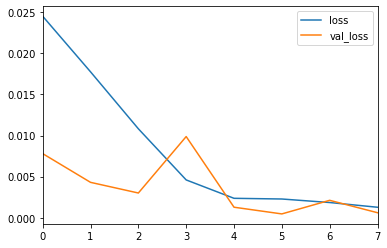

In [120]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [121]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [122]:
true_predictions = scaler.inverse_transform(test_predictions)

In [123]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

C:\Users\User\anaconda3\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


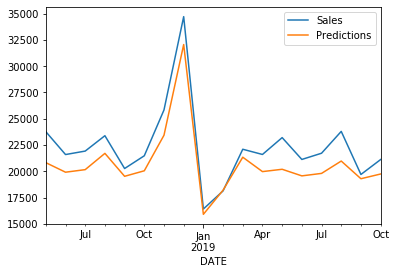

In [124]:
test.plot()

### Forecast unknown future

In [125]:
full_scaler=MinMaxScaler()

scaled_full_data=full_scaler.fit_transform(df)

length=12
generator=TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

model=Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

#in forecast feature you can't have early stop - no data to compare???
#you have to choose parameters based on first step - model with test set

model.fit_generator(generator, epochs=8)

Epoch 1/8
322/322 [==============================] - 23s 72ms/step - loss: 0.0251
Epoch 2/8
322/322 [==============================] - 21s 66ms/step - loss: 0.0161
Epoch 3/8
322/322 [==============================] - 20s 63ms/step - loss: 0.0079
Epoch 4/8
322/322 [==============================] - 22s 68ms/step - loss: 0.0037
Epoch 5/8
322/322 [==============================] - 20s 62ms/step - loss: 0.0022
Epoch 6/8
322/322 [==============================] - 21s 66ms/step - loss: 0.0025
Epoch 7/8
322/322 [==============================] - 22s 67ms/step - loss: 0.0022
Epoch 8/8
322/322 [==============================] - 21s 66ms/step - loss: 0.0015


In [126]:
forecast = []
periods=48

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [127]:
forecast=scaler.inverse_transformtransform(forecast)

In [128]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [132]:
# combine data and forecast

forecast_index=pd.date_range(start='2019-11-01', periods=periods, freq='MS')

forecast_df=pd.DataFrame(forecast, index=forecast_index, columns=['forecast'])
forecast_df

,forecast
2019-11-01,21710.812646
2019-12-01,20607.724700
2020-01-01,20820.062943
2020-02-01,22589.357578
2020-03-01,20230.119660
2020-04-01,20754.507852
2020-05-01,24735.026762
2020-06-01,34356.980712
2020-07-01,16409.970206
2020-08-01,18769.894376


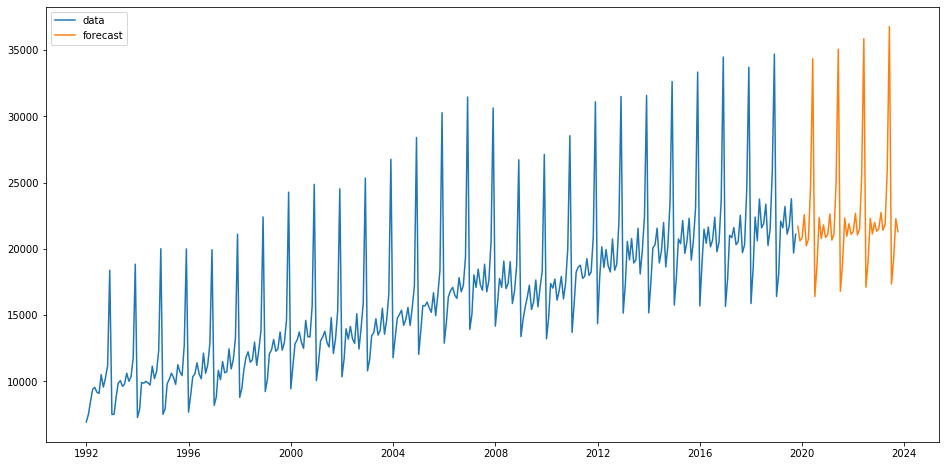

In [139]:
plt.figure(figsize=(16,8))
plt.plot(df)
plt.plot(forecast_df)
plt.legend(['data', 'forecast'])

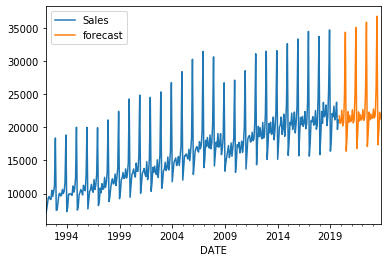

In [136]:
ax=df.plot()
forecast_df.plot(ax=ax)